In [4]:
# This is for the dataset:
# QCd_louvain_multi_clustered_harmony_ws_40pcs_20240205_SCTonly_7day_abeta_comp_run2.rdata

# Using the "scCODA" conda environment
# https://sccoda.readthedocs.io/en/latest/getting_started.html
# pip install sccoda
# pip install tensorflow-probability
# pip install tensorflow
# pip install tf-keras

# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import arviz as az
import scanpy as sc

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

import sccoda.datasets as scd
import anndata as ad

In [5]:
# Load data

cell_counts = pd.read_csv("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/tati/out/kevin/Writeup4/Writeup4_7day-abeta_composition.csv")

print(cell_counts)

               SampleID  cluster_0  cluster_1  cluster_2  cluster_3  \
0  het_7d_abeta_br1_tr2       1660       1732        448        447   
1        het_ut_br1_tr1        958       1046        289        402   
2        het_ut_br1_tr2       1796       1650        394        319   
3   wt_7d_abeta_br2_tr1       1201        873        721        416   
4   wt_7d_abeta_br2_tr2       1396       1208        390        509   
5         wt_ut_br2_tr1        897        708        536        593   
6         wt_ut_br2_tr2       1499       1143        365        291   

   cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  
0        499         51        195        227         45        124  
1        231         39        100        157         42         58  
2        540         61        204        196         57        109  
3        290        677        382        313        254        152  
4        286        282        328        262        159        121  
5        22

In [6]:
type(cell_counts)

pandas.core.frame.DataFrame

In [7]:
string = "het_7d_abeta_br1_tr2"
parts = string.split('_')[:-2]  # Keep all parts except the second-to-last and last
result = '_'.join(parts)
print(result)

het_7d_abeta


In [8]:
# Define a function to process each string
def process_string(string):
    parts = string.split('_')[:-2]  # Keep all parts except the second-to-last and last
    return '_'.join(parts)

# Apply the function to each string in the DataFrame
cell_counts['SampleID'] = cell_counts['SampleID'].apply(process_string)
cell_counts

,SampleID,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,het_7d_abeta,1660,1732,448,447,499,51,195,227,45,124
1,het_ut,958,1046,289,402,231,39,100,157,42,58
2,het_ut,1796,1650,394,319,540,61,204,196,57,109
3,wt_7d_abeta,1201,873,721,416,290,677,382,313,254,152
4,wt_7d_abeta,1396,1208,390,509,286,282,328,262,159,121
5,wt_ut,897,708,536,593,227,569,342,225,188,88
6,wt_ut,1499,1143,365,291,235,368,287,268,179,104


In [9]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["SampleID"])

print(data_all)

AnnData object with n_obs × n_vars = 7 × 10
    obs: 'SampleID'


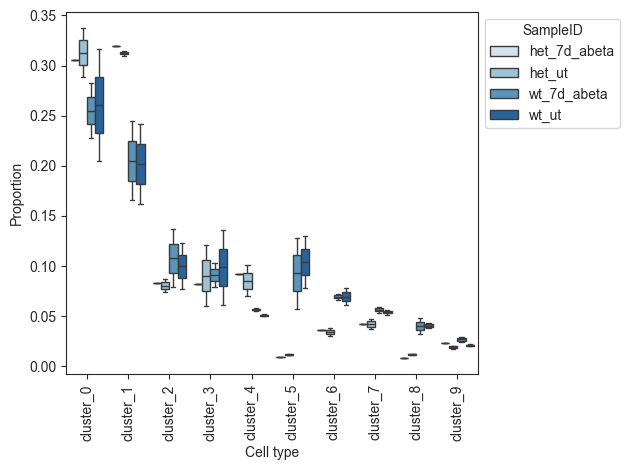

In [10]:
viz.boxplots(data_all, feature_name="SampleID")
plt.show()

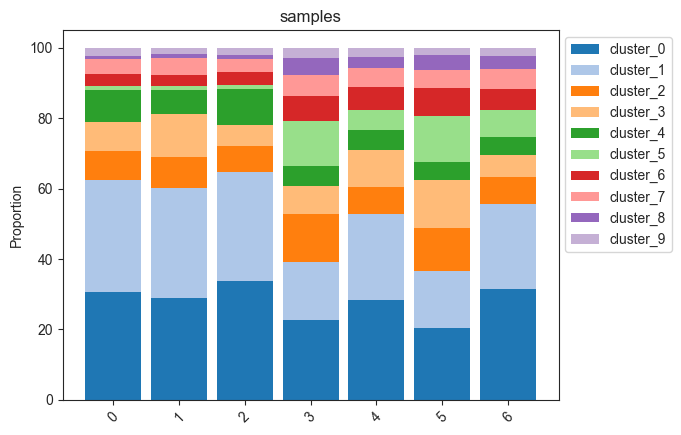

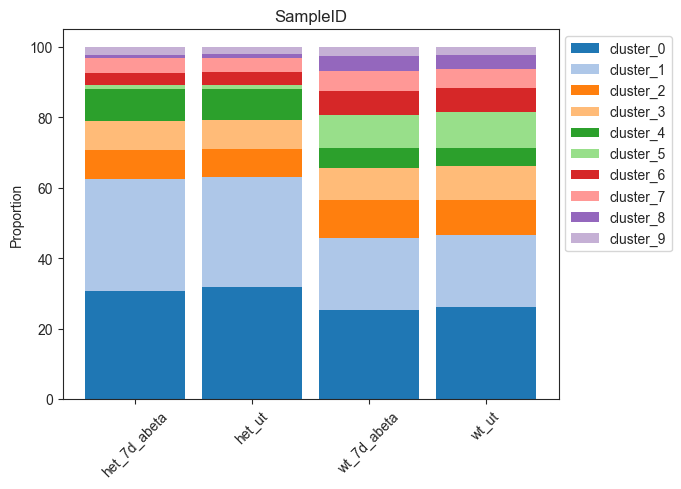

In [11]:
# Stacked barplot for each sample
viz.stacked_barplot(data_all, feature_name="samples")
plt.show()

# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_all, feature_name="SampleID")
plt.show()

In [12]:
# model all conditions at once
model_all = mod.CompositionalAnalysis(data_all, formula="SampleID", reference_cell_type="cluster_1")
all_results = model_all.sample_hmc()
all_results.summary()

I0000 00:00:1712000429.607107 45589307 service.cc:145] XLA service 0x29524e470 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712000429.607699 45589307 service.cc:153]   StreamExecutor device (0): Host, Default Version
  0%|          | 0/20000 [00:00<?, ?it/s]2024-04-01 12:40:29.764553: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712000430.248638 45589307 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
100%|██████████| 20000/20000 [00:33<00:00, 597.73it/s]


MCMC sampling finished. (42.752 sec)
Acceptance rate: 77.3%
Compositional Analysis summary:

Data: 7 samples, 10 cell types
Reference index: 1
Formula: SampleID

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
cluster_0            3.522      1415.585028
cluster_1            3.390      1240.535192
cluster_2            2.425       472.623067
cluster_3            2.385       454.091251
cluster_4            2.154       360.430147
cluster_5            0.866        99.414519
cluster_6            1.776       246.977730
cluster_7            1.812       256.030908
cluster_8            0.893       102.135276
cluster_9            1.093       124.748308


Effects:
                                   Final Parameter  Expected Sample  \
Covariate               Cell Type                                     
SampleID[T.het_ut]      cluster_0         0.000000      1415.585028   
                        cluster_1         0.000000      1240.535192   
   

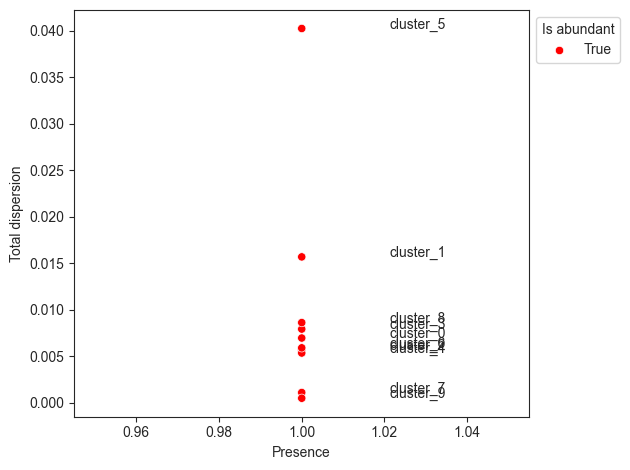

In [13]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [14]:
# Set wt_ut as "default" category

model_all = mod.CompositionalAnalysis(data_all, formula="C(SampleID, Treatment('wt_ut'))", reference_cell_type="cluster_6")
all_results = model_all.sample_hmc()
all_results.summary()

100%|██████████| 20000/20000 [00:33<00:00, 599.45it/s]


MCMC sampling finished. (42.680 sec)
Acceptance rate: 58.1%
Compositional Analysis summary:

Data: 7 samples, 10 cell types
Reference index: 6
Formula: C(SampleID, Treatment('wt_ut'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
cluster_0            3.533      1286.269237
cluster_1            3.308      1027.106848
cluster_2            2.550       481.305038
cluster_3            2.502       458.748093
cluster_4            2.088       303.232926
cluster_5            2.351       394.453492
cluster_6            2.001       277.966678
cluster_7            1.951       264.410083
cluster_8            1.410       153.930506
cluster_9            1.203       125.148526


Effects:
                                                           Final Parameter  \
Covariate                                       Cell Type                    
C(SampleID, Treatment('wt_ut'))[T.het_7d_abeta] cluster_0         0.000000   
                              

Comparing wildtype to Het (untreated)

In [15]:
# Select wt_ut and het_ut data
data_ut = data_all[data_all.obs["SampleID"].isin(["wt_ut", "het_ut"])]
print(data_ut.obs)

  SampleID
1   het_ut
2   het_ut
5    wt_ut
6    wt_ut


In [16]:
# Run scCODA with each cell type as the reference
cell_types = data_ut.var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = mod.CompositionalAnalysis(data_ut, formula="C(SampleID, Treatment('wt_ut'))", reference_cell_type=ct)
    temp_results = model_temp.sample_hmc(num_results=20000)

    # Select credible effects
    cred_eff = temp_results.credible_effects()
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: cluster_0


100%|██████████| 20000/20000 [00:33<00:00, 596.28it/s]


MCMC sampling finished. (42.705 sec)
Acceptance rate: 61.2%
Reference: cluster_1


100%|██████████| 20000/20000 [00:33<00:00, 605.44it/s]


MCMC sampling finished. (42.083 sec)
Acceptance rate: 58.5%
Reference: cluster_2


100%|██████████| 20000/20000 [00:32<00:00, 614.98it/s]


MCMC sampling finished. (41.400 sec)
Acceptance rate: 59.5%
Reference: cluster_3


100%|██████████| 20000/20000 [00:31<00:00, 625.77it/s]


MCMC sampling finished. (40.653 sec)
Acceptance rate: 57.4%
Reference: cluster_4


100%|██████████| 20000/20000 [00:31<00:00, 634.34it/s]


MCMC sampling finished. (40.124 sec)
Acceptance rate: 60.5%
Reference: cluster_5


100%|██████████| 20000/20000 [00:31<00:00, 633.93it/s]


MCMC sampling finished. (40.230 sec)
Acceptance rate: 47.6%
Reference: cluster_6


100%|██████████| 20000/20000 [00:31<00:00, 629.58it/s]


MCMC sampling finished. (40.398 sec)
Acceptance rate: 56.8%
Reference: cluster_7


100%|██████████| 20000/20000 [00:32<00:00, 624.46it/s]


MCMC sampling finished. (40.675 sec)
Acceptance rate: 55.2%
Reference: cluster_8


100%|██████████| 20000/20000 [00:32<00:00, 624.01it/s]


MCMC sampling finished. (40.854 sec)
Acceptance rate: 52.9%
Reference: cluster_9


100%|██████████| 20000/20000 [00:31<00:00, 630.91it/s]


MCMC sampling finished. (40.357 sec)
Acceptance rate: 58.3%


In [17]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)

           times_credible  pct_credible  is_credible
cluster_0               0           0.0        False
cluster_1               0           0.0        False
cluster_2               0           0.0        False
cluster_3               0           0.0        False
cluster_4               0           0.0        False
cluster_5               9           0.9         True
cluster_6               0           0.0        False
cluster_7               0           0.0        False
cluster_8               0           0.0        False
cluster_9               0           0.0        False


Comparing wildtype untreated to wildtype 7day abeta

In [18]:
# Select wt_ut and het_ut data
data_ut = data_all[data_all.obs["SampleID"].isin(["wt_ut", "wt_7d_abeta"])]
print(data_ut.obs)

      SampleID
3  wt_7d_abeta
4  wt_7d_abeta
5        wt_ut
6        wt_ut


In [19]:
# Run scCODA with each cell type as the reference
cell_types = data_ut.var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    model_temp = mod.CompositionalAnalysis(data_ut, formula="C(SampleID, Treatment('wt_ut'))", reference_cell_type=ct)
    temp_results = model_temp.sample_hmc(num_results=20000)

    # Select credible effects
    cred_eff = temp_results.credible_effects()
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: cluster_0


100%|██████████| 20000/20000 [00:31<00:00, 634.24it/s]


MCMC sampling finished. (40.243 sec)
Acceptance rate: 41.3%
Reference: cluster_1


100%|██████████| 20000/20000 [00:31<00:00, 636.06it/s]


MCMC sampling finished. (40.075 sec)
Acceptance rate: 48.8%
Reference: cluster_2


100%|██████████| 20000/20000 [00:31<00:00, 630.00it/s]


MCMC sampling finished. (40.435 sec)
Acceptance rate: 43.4%
Reference: cluster_3


100%|██████████| 20000/20000 [00:32<00:00, 624.50it/s]


MCMC sampling finished. (40.794 sec)
Acceptance rate: 52.1%
Reference: cluster_4


100%|██████████| 20000/20000 [00:31<00:00, 626.18it/s]


MCMC sampling finished. (40.621 sec)
Acceptance rate: 40.0%
Reference: cluster_5


100%|██████████| 20000/20000 [00:31<00:00, 631.21it/s]


MCMC sampling finished. (40.278 sec)
Acceptance rate: 42.7%
Reference: cluster_6


100%|██████████| 20000/20000 [00:32<00:00, 623.09it/s]


MCMC sampling finished. (40.734 sec)
Acceptance rate: 56.0%
Reference: cluster_7


100%|██████████| 20000/20000 [00:31<00:00, 628.75it/s]


MCMC sampling finished. (40.595 sec)
Acceptance rate: 42.2%
Reference: cluster_8


100%|██████████| 20000/20000 [00:31<00:00, 629.04it/s]


MCMC sampling finished. (40.429 sec)
Acceptance rate: 58.3%
Reference: cluster_9


100%|██████████| 20000/20000 [00:31<00:00, 631.54it/s]


MCMC sampling finished. (40.293 sec)
Acceptance rate: 41.9%


In [20]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"]/len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)

           times_credible  pct_credible  is_credible
cluster_0               0           0.0        False
cluster_1               0           0.0        False
cluster_2               0           0.0        False
cluster_3               0           0.0        False
cluster_4               0           0.0        False
cluster_5               0           0.0        False
cluster_6               0           0.0        False
cluster_7               0           0.0        False
cluster_8               0           0.0        False
cluster_9               0           0.0        False
